In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceshiptitanic/sample_submission.csv
/kaggle/input/spaceshiptitanic/train.csv
/kaggle/input/spaceshiptitanic/test.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/spaceshiptitanic/train.csv')
test_data = pd.read_csv('/kaggle/input/spaceshiptitanic/test.csv')

In [3]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_data.corr()['Transported']

Age            -0.075026
RoomService    -0.244611
FoodCourt       0.046566
ShoppingMall    0.010141
Spa            -0.221131
VRDeck         -0.207075
Transported     1.000000
Name: Transported, dtype: float64

In [5]:
train_data['Cabin'].nunique()

6560

In [6]:
features = ['HomePlanet','CryoSleep','Destination','VIP']
train_data = train_data.dropna(subset=['Age'])
X = pd.get_dummies(train_data[features])
X = pd.concat([X,train_data['Age']],axis=1)
y = train_data['Transported']
data = pd.concat([X,y],axis=1)
data.corr()['Transported']

HomePlanet_Earth            -0.168240
HomePlanet_Europa            0.176399
HomePlanet_Mars              0.019765
CryoSleep_False             -0.450897
CryoSleep_True               0.459296
Destination_55 Cancri e      0.108094
Destination_PSO J318.5-22    0.000124
Destination_TRAPPIST-1e     -0.093429
VIP_False                    0.024502
VIP_True                    -0.036973
Age                         -0.075026
Transported                  1.000000
Name: Transported, dtype: float64

In [7]:
x_test = pd.concat([pd.get_dummies(test_data[features]),test_data['Age']],axis=1)
x_test.head()

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,Age
0,1,0,0,0,1,0,0,1,1,0,27.0
1,1,0,0,1,0,0,0,1,1,0,19.0
2,0,1,0,0,1,1,0,0,1,0,31.0
3,0,1,0,1,0,0,0,1,1,0,38.0
4,1,0,0,1,0,0,0,1,1,0,20.0


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=101)

In [9]:
X_train.shape

(6811, 11)

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Dropout
model = Sequential()
model.add(Dense(100,activation='sigmoid'))
model.add(Dense(25,activation='sigmoid'))
model.add(Dense(6,activation='sigmoid'))

model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x=X_train,y=y_train,epochs=200,validation_data=(X_test, y_test),callbacks=(early_stop))


2022-05-26 08:13:31.614914: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-05-26 08:13:31.757247: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
213/213 [==============================] - 2s 4ms/step - loss: 0.7052 - val_loss: 0.6881
Epoch 2/200
213/213 [==============================] - 1s 3ms/step - loss: 0.6650 - val_loss: 0.6200
Epoch 3/200
213/213 [==============================] - 1s 2ms/step - loss: 0.5925 - val_loss: 0.5634
Epoch 4/200
213/213 [==============================] - 1s 3ms/step - loss: 0.5691 - val_loss: 0.5522
Epoch 5/200
213/213 [==============================] - 1s 2ms/step - loss: 0.5624 - val_loss: 0.5491
Epoch 6/200
213/213 [==============================] - 1s 3ms/step - loss: 0.5583 - val_loss: 0.5434
Epoch 7/200
213/213 [==============================] - 1s 3ms/step - loss: 0.5548 - val_loss: 0.5444
Epoch 8/200
213/213 [==============================] - 1s 3ms/step - loss: 0.5515 - val_loss: 0.5402
Epoch 9/200
213/213 [==============================] - 1s 2ms/step - loss: 0.5503 - val_loss: 0.5373
Epoch 10/200
213/213 [==============================] - 1s 3ms/step - loss: 0.5491 - val_lo

<AxesSubplot:>

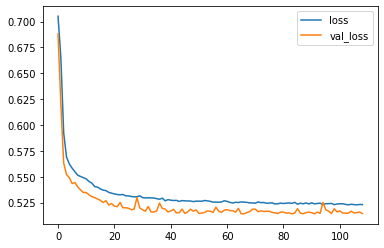

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()
#losses[['loss']].plot()

In [12]:
"""
from xgboost import XGBRegressor


my_model = XGBRegressor(n_estimators=10000, learning_rate=0.05)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=20, 
             eval_set=[(X_test, y_test)],
             verbose=False)
pred = my_model.predict(X_test)>0.5
pred

"""

'\nfrom xgboost import XGBRegressor\n\n\nmy_model = XGBRegressor(n_estimators=10000, learning_rate=0.05)\nmy_model.fit(X_train, y_train, \n             early_stopping_rounds=20, \n             eval_set=[(X_test, y_test)],\n             verbose=False)\npred = my_model.predict(X_test)>0.5\npred\n\n'

In [13]:
"""
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

"""

'\nfrom sklearn.metrics import accuracy_score\naccuracy_score(y_test, pred)\n\n'

In [14]:
predictions = model.predict(x_test)>0.5

predictions = predictions.reshape(predictions.shape[0]*predictions.shape[1])
predictions


array([ True, False,  True, ..., False, False,  True])

In [15]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Transported': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
